# Housing Price Prediction Analysis

## Objectives

* To explore and clean the housing dataset, preparing it for analysis.
* To visualize correlations between various house attributes and sale prices.
* To build predictive models to forecast housing prices based on selected features.

## Inputs

* Housing dataset sourced from [Kaggle](https://www.kaggle.com/codeinstitute/housing-prices-data).
* Python libraries: numpy, pandas, matplotlib, seaborn, ydata-profiling, plotly, ppscore, streamlit, feature-engine, imbalanced-learn, scikit-learn, xgboost, yellowbrick, Jinja2,          MarkupSafe, protobuf, ipywidgets, altair.
* Datasets:
  - `house_prices_records.csv`: Contains historical housing data including various features and sale prices.
  - `inherited_houses.csv`: Contains data for the inherited houses for which we want to predict sale prices.


## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [ ]:
import os
current_dir = os.getcwd()
current_dir

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [ ]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

Confirm the new current directory

In [ ]:
current_dir = os.getcwd()
current_dir

# Section 1

Load required libraries.

In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib

---

# Section 2

Loading first five rows from datasets.

In [ ]:
import pandas as pd

# Load the datasets
inherited_houses_path = '/workspace/house_project1/data/inherited_houses.csv'
house_prices_records_path = '/workspace/house_project1/data/house_prices_records.csv'

inherited_houses_df = pd.read_csv(inherited_houses_path)
house_prices_df = pd.read_csv(house_prices_records_path)

# Display the first few rows of each dataset
print("Inherited Houses Data:")
print(inherited_houses_df.head())

print("\nHouse Prices Records Data:")
print(house_prices_df.head())


 Data Cleaning & Preperation 

In [31]:
# Step 3: Advanced Data Cleaning and Preparation for Both Files

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
inherited_houses_df = pd.read_csv('/workspace/house_project1/data/inherited_houses.csv')
house_prices_df = pd.read_csv('/workspace/house_project1/data/house_prices_records.csv')

# Function to clean inherited houses data
def clean_inherited_houses(data):
    # Check for missing values
    print("Missing values in inherited houses:\n", data.isnull().sum())

    # Visualize missing values
    plt.figure(figsize=(12, 6))
    sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Values in Inherited Houses Data')
    plt.show()

    # Fill missing values for numerical and categorical features
    for column in data.select_dtypes(include=[np.number]).columns:
        data[column].fillna(data[column].median(), inplace=True)

    for column in data.select_dtypes(include=[object]).columns:
        data[column].fillna(data[column].mode()[0], inplace=True)

    # Check data types and convert if necessary
    print("Data types in inherited houses:\n", data.dtypes)
   
    # Convert categorical variables to 'category' dtype
    categorical_cols = data.select_dtypes(include=[object]).columns
    data[categorical_cols] = data[categorical_cols].astype('category')

    # Detect and remove outliers using IQR method
    def detect_outliers_iqr(data):
        outlier_indices = []
        for col in data.select_dtypes(include=[np.number]).columns:
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
            outlier_indices.extend(outliers.index.tolist())
        return set(outlier_indices)

    outlier_indices = detect_outliers_iqr(data)

    # Remove outliers
    data = data.drop(index=outlier_indices)
    print(f"Number of outliers removed from inherited houses: {len(outlier_indices)}")

    # Feature engineering: Create HouseAge feature
    if 'YearBuilt' in data.columns:  # Ensure YearBuilt exists
        data['HouseAge'] = 2024 - data['YearBuilt']

    # Prepare the feature set and target variable
    X_inherited = data.drop(['SalePrice'], axis=1)  # Replace 'SalePrice' accordingly
    y_inherited = data['SalePrice']

    # Encode categorical variables
    X_inherited = pd.get_dummies(X_inherited, drop_first=True)

    print("Final feature set shape for inherited houses:", X_inherited.shape)
    print("First few rows of features for inherited houses:\n", X_inherited.head())

    return X_inherited, y_inherited


In [ ]:
# Function to clean inherited houses data
def clean_inherited_houses(data):
    # Check for missing values
    print("Missing values in inherited houses:\n", data.isnull().sum())

    # Visualize missing values
    plt.figure(figsize=(12, 6))
    sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Values in Inherited Houses Data')
    plt.show()

    # Fill missing values for numerical and categorical features
    for column in data.select_dtypes(include=[np.number]).columns:
        data[column].fillna(data[column].median(), inplace=True)

    for column in data.select_dtypes(include=[object]).columns:
        data[column].fillna(data[column].mode()[0], inplace=True)

    # Convert categorical variables to 'category' dtype
    categorical_cols = data.select_dtypes(include=[object]).columns
    data[categorical_cols] = data[categorical_cols].astype('category')

    # Detect and remove outliers using IQR method
    def detect_outliers_iqr(data):
        outlier_indices = []
        for col in data.select_dtypes(include=[np.number]).columns:
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
            outlier_indices.extend(outliers.index.tolist())
        return set(outlier_indices)

    outlier_indices = detect_outliers_iqr(data)

    # Remove outliers
    data = data.drop(index=outlier_indices)
    print(f"Number of outliers removed from inherited houses: {len(outlier_indices)}")

    # Feature engineering: Create HouseAge feature
    if 'YearBuilt' in data.columns:  # Ensure YearBuilt exists
        data['HouseAge'] = 2024 - data['YearBuilt']

    # Prepare the feature set
    X_inherited = data

    # Encode categorical variables
    X_inherited = pd.get_dummies(X_inherited, drop_first=True)

    print("Final feature set shape for inherited houses:", X_inherited.shape)
    print("First few rows of features for inherited houses:\n", X_inherited.head())

    return X_inherited

# Clean the inherited houses dataset
X_inherited = clean_inherited_houses(inherited_houses_df)

In [ ]:
# Function to clean house prices data
def clean_house_prices(data):
    # Check for missing values
    print("Missing values in house prices:\n", data.isnull().sum())

    # Visualize missing values
    plt.figure(figsize=(12, 6))
    sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Values in House Prices Data')
    plt.show()

    # Fill missing values for numerical features with median
    for column in data.select_dtypes(include=[np.number]).columns:
        data[column].fillna(data[column].median(), inplace=True)

    # Encode categorical variables
    categorical_cols = data.select_dtypes(include=[object]).columns
    data[categorical_cols] = data[categorical_cols].astype('category')
    data = pd.get_dummies(data, drop_first=True)

    print("Final feature set shape for house prices:", data.shape)
    print("First few rows of features for house prices:\n", data.head())

    return data

# Clean the house prices dataset
house_prices_df_cleaned = clean_house_prices(house_prices_df)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
inherited_houses_df = pd.read_csv('/workspace/house_project1/data/inherited_houses.csv')

# Function to handle missing values
def handle_missing_values(data, num_imputation='median', cat_imputation='mode'):
    for column in data.select_dtypes(include=[np.number]).columns:
        if num_imputation == 'mean':
            data[column].fillna(data[column].mean(), inplace=True)
        elif num_imputation == 'median':
            data[column].fillna(data[column].median(), inplace=True)
        elif num_imputation == 'constant':
            data[column].fillna(0, inplace=True)  # Example constant
   
    for column in data.select_dtypes(include=[object]).columns:
        if cat_imputation == 'mode':
            data[column].fillna(data[column].mode()[0], inplace=True)
        elif cat_imputation == 'constant':
            data[column].fillna('Unknown', inplace=True)  # Example constant

    return data

# Function to remove outliers using multiple methods
def remove_outliers(data, method='IQR'):
    if method == 'IQR':
        for col in data.select_dtypes(include=[np.number]).columns:
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    elif method == 'Z-score':
        from scipy import stats
        z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
        data = data[(z_scores < 3).all(axis=1)]
    elif method == 'IsolationForest':
        iso = IsolationForest(contamination=0.05)  # Adjust contamination as needed
        preds = iso.fit_predict(data.select_dtypes(include=[np.number]))
        data = data[preds != -1]
   
    return data

# Function to normalize features
def normalize_features(data, method='standard'):
    numerical_cols = data.select_dtypes(include=[np.number]).columns
    if method == 'standard':
        scaler = StandardScaler()
    elif method == 'minmax':
        scaler = MinMaxScaler()
    elif method == 'robust':
        scaler = RobustScaler()
   
    data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
    return data

# Function to clean inherited houses data
def clean_inherited_houses(data, num_imputation='median', cat_imputation='mode', outlier_method='IQR', normalization_method='standard'):
    print("Initial shape of the dataset:", data.shape)

    # Step 1: Handle missing values
    data = handle_missing_values(data, num_imputation, cat_imputation)

    # Step 2: Remove outliers
    data = remove_outliers(data, method=outlier_method)

    # Step 3: Feature Engineering
    data['HouseAge'] = 2024 - data['YearBuilt']
    data['TotalArea'] = (data['1stFlrSF'] + data['2ndFlrSF'] +
                         data['TotalBsmtSF'] + data['GarageArea'] +
                         data['WoodDeckSF'] + data['OpenPorchSF'] +
                         data['EnclosedPorch'])

    # Step 4: Encode categorical variables
    categorical_cols = data.select_dtypes(include=[object]).columns
    data[categorical_cols] = data[categorical_cols].astype('category')
    data = pd.get_dummies(data, drop_first=True)

    # Step 5: Normalize numerical features
    data = normalize_features(data, method=normalization_method)

    print("\nFinal feature set shape for inherited houses:", data.shape)
    print("First few rows of features for inherited houses:\n", data.head())

    return data

# Clean the inherited houses dataset with different parameters
inherited_houses_df_cleaned = clean_inherited_houses(
    inherited_houses_df,
    num_imputation='median',
    cat_imputation='mode',
    outlier_method='IQR',
    normalization_method='standard'
)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (ensure this path is correct)
house_prices_df = pd.read_csv('/workspace/house_project1/data/house_prices_records.csv')

# Function to visualize missing values
def visualize_missing_values(data, title='Missing Values'):
    plt.figure(figsize=(12, 6))
    sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
    plt.title(title)
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()

# Function to display summary statistics
def display_summary_statistics(data, title='Summary Statistics'):
    print(f"\n{title}:")
    display(data.describe(include='all'))

# Function to display final dataset shape
def display_final_shape(data):
    print(f"\nFinal shape of the dataset: {data.shape}")

# Function to handle missing values
def handle_missing_values(data, num_imputation='median', cat_imputation='mode'):
    # Fill missing values for numerical features
    for column in data.select_dtypes(include=[np.number]).columns:
        data[column].fillna(data[column].median(), inplace=True)

    # Fill missing values for categorical features
    for column in data.select_dtypes(include=[object]).columns:
        data[column].fillna(data[column].mode()[0], inplace=True)

    return data

# Function to remove outliers based on IQR
def remove_outliers(data, method='IQR'):
    if method == 'IQR':
        for column in data.select_dtypes(include=[np.number]).columns:
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Function to normalize numerical features
def normalize_features(data, method='standard'):
    if method == 'standard':
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        numerical_cols = data.select_dtypes(include=[np.number]).columns
        data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
    return data

# Function to clean house prices data with detailed output
def clean_house_prices(data, num_imputation='median', cat_imputation='mode', outlier_method='IQR', normalization_method='standard'):
    print("Initial shape of the dataset:", data.shape)
   
    # Display initial summary statistics
    display_summary_statistics(data, title='Initial Summary Statistics')

    # Step 1: Handle missing values
    visualize_missing_values(data, title='Missing Values Before Cleaning')
    data = handle_missing_values(data, num_imputation, cat_imputation)

    # Step 2: Remove outliers
    data_before_outlier_removal = data.copy()
    data = remove_outliers(data, method=outlier_method)

    # Visualize outliers before and after
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=data_before_outlier_removal.select_dtypes(include=[np.number]).melt(value_vars=data_before_outlier_removal.select_dtypes(include=[np.number]).columns), x='variable', y='value')
    plt.title('Outliers Before Removal')
    plt.xticks(rotation=90)

    plt.subplot(1, 2, 2)
    sns.boxplot(data=data.select_dtypes(include=[np.number]).melt(value_vars=data.select_dtypes(include=[np.number]).columns), x='variable', y='value')
    plt.title('Outliers After Removal')
    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

    # Step 3: Encode categorical variables
    categorical_cols = data.select_dtypes(include=[object]).columns
    data[categorical_cols] = data[categorical_cols].astype('category')
    data = pd.get_dummies(data, drop_first=True)

    # Step 4: Normalize numerical features
    data = normalize_features(data, method=normalization_method)

    # Display final summary statistics
    display_summary_statistics(data, title='Final Summary Statistics')
   
    # Display final shape
    display_final_shape(data)
   
    return data

# Clean the house prices dataset and display results
house_prices_df_cleaned = clean_house_prices(
    house_prices_df,
    num_imputation='median',
    cat_imputation='mode',
    outlier_method='IQR',
    normalization_method='standard'
)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset 
house_prices_df = pd.read_csv('/workspace/house_project1/data/house_prices_records.csv')

# Function to visualize missing values
def visualize_missing_values(data, title='Missing Values'):
    plt.figure(figsize=(12, 6))
    sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
    plt.title(title)
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()

# Function to display summary statistics
def display_summary_statistics(data, title='Summary Statistics'):
    print(f"\n{title}:")
    display(data.describe(include='all'))

# Function to display final dataset shape
def display_final_shape(data):
    print(f"\nFinal shape of the dataset: {data.shape}")

# Function to handle missing values
def handle_missing_values(data):
    # Fill missing values for numerical features
    for column in data.select_dtypes(include=[np.number]).columns:
        data[column].fillna(data[column].median(), inplace=True)

    # Fill missing values for categorical features
    for column in data.select_dtypes(include=[object]).columns:
        data[column].fillna(data[column].mode()[0], inplace=True)

    return data

# Function to remove outliers based on IQR
def remove_outliers(data):
    for column in data.select_dtypes(include=[np.number]).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Function to normalize numerical features
def normalize_features(data):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    numerical_cols = data.select_dtypes(include=[np.number]).columns
    data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
    return data

# Function to clean house prices data with detailed output
def clean_house_prices(data):
    print("Initial shape of the dataset:", data.shape)
   
    # Display initial summary statistics
    display_summary_statistics(data, title='Initial Summary Statistics')

    # Step 1: Handle missing values
    visualize_missing_values(data, title='Missing Values Before Cleaning')
    data = handle_missing_values(data)

    # Step 2: Remove outliers
    data_before_outlier_removal = data.copy()
    data = remove_outliers(data)

    # Dynamic Boxplot Visualization for Outliers
    numerical_features = data.select_dtypes(include=[np.number]).columns
    n_features = len(numerical_features)
   
    # Adjusting layout based on the number of features
    fig, axes = plt.subplots(1, 2, figsize=(6 * n_features // 2, 6))  # Dynamic size
    plt.subplots_adjust(wspace=0.3)

    sns.boxplot(data=data_before_outlier_removal[numerical_features].melt(), x='variable', y='value', ax=axes[0])
    axes[0].set_title('Outliers Before Removal')
    axes[0].tick_params(axis='x', rotation=90)

    sns.boxplot(data=data[numerical_features].melt(), x='variable', y='value', ax=axes[1])
    axes[1].set_title('Outliers After Removal')
    axes[1].tick_params(axis='x', rotation=90)

    plt.show()

    # Step 3: Encode categorical variables
    categorical_cols = data.select_dtypes(include=[object]).columns
    data[categorical_cols] = data[categorical_cols].astype('category')
    data = pd.get_dummies(data, drop_first=True)

    # Step 4: Normalize numerical features
    data = normalize_features(data)

    # Display final summary statistics
    display_summary_statistics(data, title='Final Summary Statistics')
   
    # Display final shape
    display_final_shape(data)
   
    return data

# Clean the house prices dataset and display results
house_prices_df_cleaned = clean_house_prices(house_prices_df)

---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load your dataset from the specified path
file_path = "/workspace/house_project1/data/house_prices_records.csv"
house_prices_df = pd.read_csv(file_path)

# Define feature columns and target
selected_features = [
    '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtUnfSF',
    'EnclosedPorch', 'GarageArea', 'GarageYrBlt', 'GrLivArea', 'KitchenQual',
    'LotArea', 'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'OverallCond',
    'OverallQual', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd'
]
X = house_prices_df[selected_features].copy()
y = house_prices_df['SalePrice']

# Separate numerical and categorical columns
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Define the preprocessing pipelines
# Numerical Pipeline
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical Pipeline
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))
])

# Combine the pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_cols),
        ('cat', cat_pipeline, cat_cols)
    ]
)

# Apply transformations to the training data
X_processed = preprocessor.fit_transform(X)

# Convert the processed array back to DataFrame for ease of interpretation
# This step is useful for accessing column names after encoding
cat_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(cat_cols)
all_feature_names = num_cols + list(cat_feature_names)
X_processed_df = pd.DataFrame(X_processed, columns=all_feature_names)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions and Model Evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Display evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Visualize feature importances
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importances from Random Forest Model")
plt.show()

In [ ]:
print(house_prices_df.columns)

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('/workspace/house_project1/data/house_prices_records.csv')

# Display the first few rows to verify it loaded correctly
print(df.head())
print(df.info())
print(df.describe())

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/workspace/house_project1/data/house_prices_records.csv'
df = pd.read_csv(file_path)

# Display initial information about the dataset
print("Initial Data Overview:")
print(df.info())
print("\nInitial Data Summary:")
print(df.describe())

# Data Preprocessing
# Handle missing values by filling them with median (numerical) or mode (categorical)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# Display the updated dataset information
print("\nAfter Handling Missing Values:")
print(df.info())

# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Filter for numeric columns in the encoded DataFrame
numeric_df_encoded = df_encoded.select_dtypes(include=[np.number])

# Correlation Heatmap of numerical features
plt.figure(figsize=(16, 10))
sns.heatmap(numeric_df_encoded.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap Including Encoded Categorical Features')
plt.show()

# Key insights from correlation
# Display highly correlated features with 'SalePrice'
correlation_matrix = numeric_df_encoded.corr()
high_corr_features = correlation_matrix['SalePrice'].sort_values(ascending=False)
print("\nHighly Correlated Features with SalePrice:")
print(high_corr_features[high_corr_features > 0.5])


In [ ]:
# Exploratory Data Analysis: Visualizing the relationship between SalePrice and key features
high_corr_features = ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'YearRemodAdd']

# Set up the plotting area
plt.figure(figsize=(15, 12))

# Loop through each feature and create a scatter plot to see the relationship with SalePrice
for i, feature in enumerate(high_corr_features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df[feature], y=df['SalePrice'])
    plt.title(f'SalePrice vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

# Pairplot for in-depth analysis
sns.pairplot(df, vars=high_corr_features + ['SalePrice'], diag_kind='kde')
plt.suptitle('Pairplot of Highly Correlated Features with SalePrice', y=1.02)
plt.show()

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Select Features Based on Correlation
# Using features with high correlation to SalePrice for the model
selected_features = ['OverallQual', 'GrLivArea', 'GarageArea', 
                     'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'YearRemodAdd']

X = df[selected_features]
y = df['SalePrice']

# Step 2: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Data Preprocessing - Scaling
# Standardize the features to ensure they all have a mean of 0 and standard deviation of 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make Predictions and Evaluate the Model
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print("Model Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the inherited houses dataset
inherited_houses_df = pd.read_csv('/workspace/house_project1/data/inherited_houses.csv')

def clean_inherited_houses(data):
    # Handling missing values:
    # Fill missing numerical values with the median
    for column in data.select_dtypes(include=['float64', 'int64']).columns:
        data[column].fillna(data[column].median(), inplace=True)
    
    # Fill missing categorical values with the mode
    for column in data.select_dtypes(include=['object']).columns:
        data[column].fillna(data[column].mode()[0], inplace=True)

    # Feature Engineering:
    # Create new features: HouseAge and YearsSinceRemodel
    data['HouseAge'] = 2024 - data['YearBuilt']
    data['YearsSinceRemodel'] = 2024 - data['YearRemodAdd']
    
    # Drop original columns if needed
    data.drop(['YearBuilt', 'YearRemodAdd'], axis=1, inplace=True)
    
    # Encode Categorical Variables:
    # Convert ordinal categories to numerical values
    ordinal_mapping = {
        'KitchenQual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
        'BsmtExposure': {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},
        'BsmtFinType1': {'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
        'GarageFinish': {'Unf': 1, 'RFn': 2, 'Fin': 3}
    }
    
    for col, mapping in ordinal_mapping.items():
        data[col] = data[col].map(mapping)
    
    # Perform one-hot encoding on any remaining categorical variables
    data = pd.get_dummies(data, drop_first=True)
    
    # Standardize Numerical Features
    scaler = StandardScaler()
    numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
    data[numerical_features] = scaler.fit_transform(data[numerical_features])

    # Display summary of cleaned data
    print("Data after cleaning and preparation:")
    print(data.describe())
    
    return data

# Clean the inherited houses dataset
X_inherited_cleaned = clean_inherited_houses(inherited_houses_df)

# Display the first few rows of the cleaned dataset
X_inherited_cleaned.head()

In [24]:
import pandas as pd 
# Step 1: Load and prepare the inherited houses dataset
inherited_houses_df = pd.read_csv('/workspace/house_project1/data/inherited_houses.csv')

# Select the same features used in training
X_inherited = inherited_houses_df[selected_features]

# Apply the same scaler used on the training set
X_inherited_scaled = scaler.transform(X_inherited)

Step 1 : Step 1: Data Loading and Initial Overview
Let’s start by loading the datasets and performing an initial check.

In [33]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
# Cell 2: Load the datasets
inherited_houses_df = pd.read_csv('/workspace/house_project1/data/inherited_houses.csv')
house_prices_df = pd.read_csv('/workspace/house_project1/data/house_prices_records.csv')


In [35]:
# Display the first few rows of each dataset
print("Inherited Houses Data:")
print(inherited_houses_df.head())
print("\nHouse Prices Records Data:")
print(house_prices_df.head())

Inherited Houses Data:
   1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0       896         0             2           No       468.0          Rec   
1      1329         0             3           No       923.0          ALQ   
2       928       701             3           No       791.0          GLQ   
3       926       678             3           No       602.0          GLQ   

   BsmtUnfSF  EnclosedPorch  GarageArea GarageFinish  ...  LotArea  \
0      270.0              0       730.0          Unf  ...    11622   
1      406.0              0       312.0          Unf  ...    14267   
2      137.0              0       482.0          Fin  ...    13830   
3      324.0              0       470.0          Fin  ...     9978   

   LotFrontage MasVnrArea  OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  \
0         80.0        0.0            0            6            5        882.0   
1         81.0      108.0           36            6            6       1329.0 

Step 2: Data Cleaning and Preprocessing
We'll handle missing values, outliers, encoding, and normalization.

In [37]:
# Cell 3: Define data cleaning functions

# Function to handle missing values
def handle_missing_values(data, num_imputation='median', cat_imputation='mode'):
    for column in data.select_dtypes(include=[np.number]).columns:
        if num_imputation == 'median':
            data[column].fillna(data[column].median(), inplace=True)
        elif num_imputation == 'mean':
            data[column].fillna(data[column].mean(), inplace=True)
    for column in data.select_dtypes(include=['object']).columns:
        data[column].fillna(data[column].mode()[0], inplace=True)
    return data

# Function to remove outliers using IQR
def remove_outliers(data):
    for column in data.select_dtypes(include=[np.number]).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        data = data[(data[column] >= Q1 - 1.5 * IQR) & (data[column] <= Q3 + 1.5 * IQR)]
    return data

# Function to encode and normalize features
from sklearn.preprocessing import StandardScaler

def preprocess_data(data):
    # Handle missing values
    data = handle_missing_values(data)
    # Remove outliers
    data = remove_outliers(data)
    # Encoding categorical variables
    categorical_cols = data.select_dtypes(include=['object']).columns
    data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
    # Standardize numerical features
    scaler = StandardScaler()
    num_cols = data.select_dtypes(include=[np.number]).columns
    data[num_cols] = scaler.fit_transform(data[num_cols])
    return data

# Clean both datasets
house_prices_df_cleaned = preprocess_data(house_prices_df)
inherited_houses_df_cleaned = preprocess_data(inherited_houses_df)

Step 3: Feature Engineering
Now, let’s create relevant new features like HouseAge and TotalArea.

In [38]:
# Feature Engineering

def feature_engineering(data):
    # Create new features: HouseAge and TotalArea
    data['HouseAge'] = 2024 - data['YearBuilt']
    data['TotalArea'] = (data['1stFlrSF'] + data['2ndFlrSF'] +
                         data['TotalBsmtSF'] + data['GarageArea'] +
                         data['WoodDeckSF'] + data['OpenPorchSF'] +
                         data['EnclosedPorch'])
    # Drop columns that are no longer needed
    data.drop(columns=['YearBuilt'], inplace=True, errors='ignore')
    return data

# Apply feature engineering
house_prices_df_cleaned = feature_engineering(house_prices_df_cleaned)
inherited_houses_df_cleaned = feature_engineering(inherited_houses_df_cleaned)

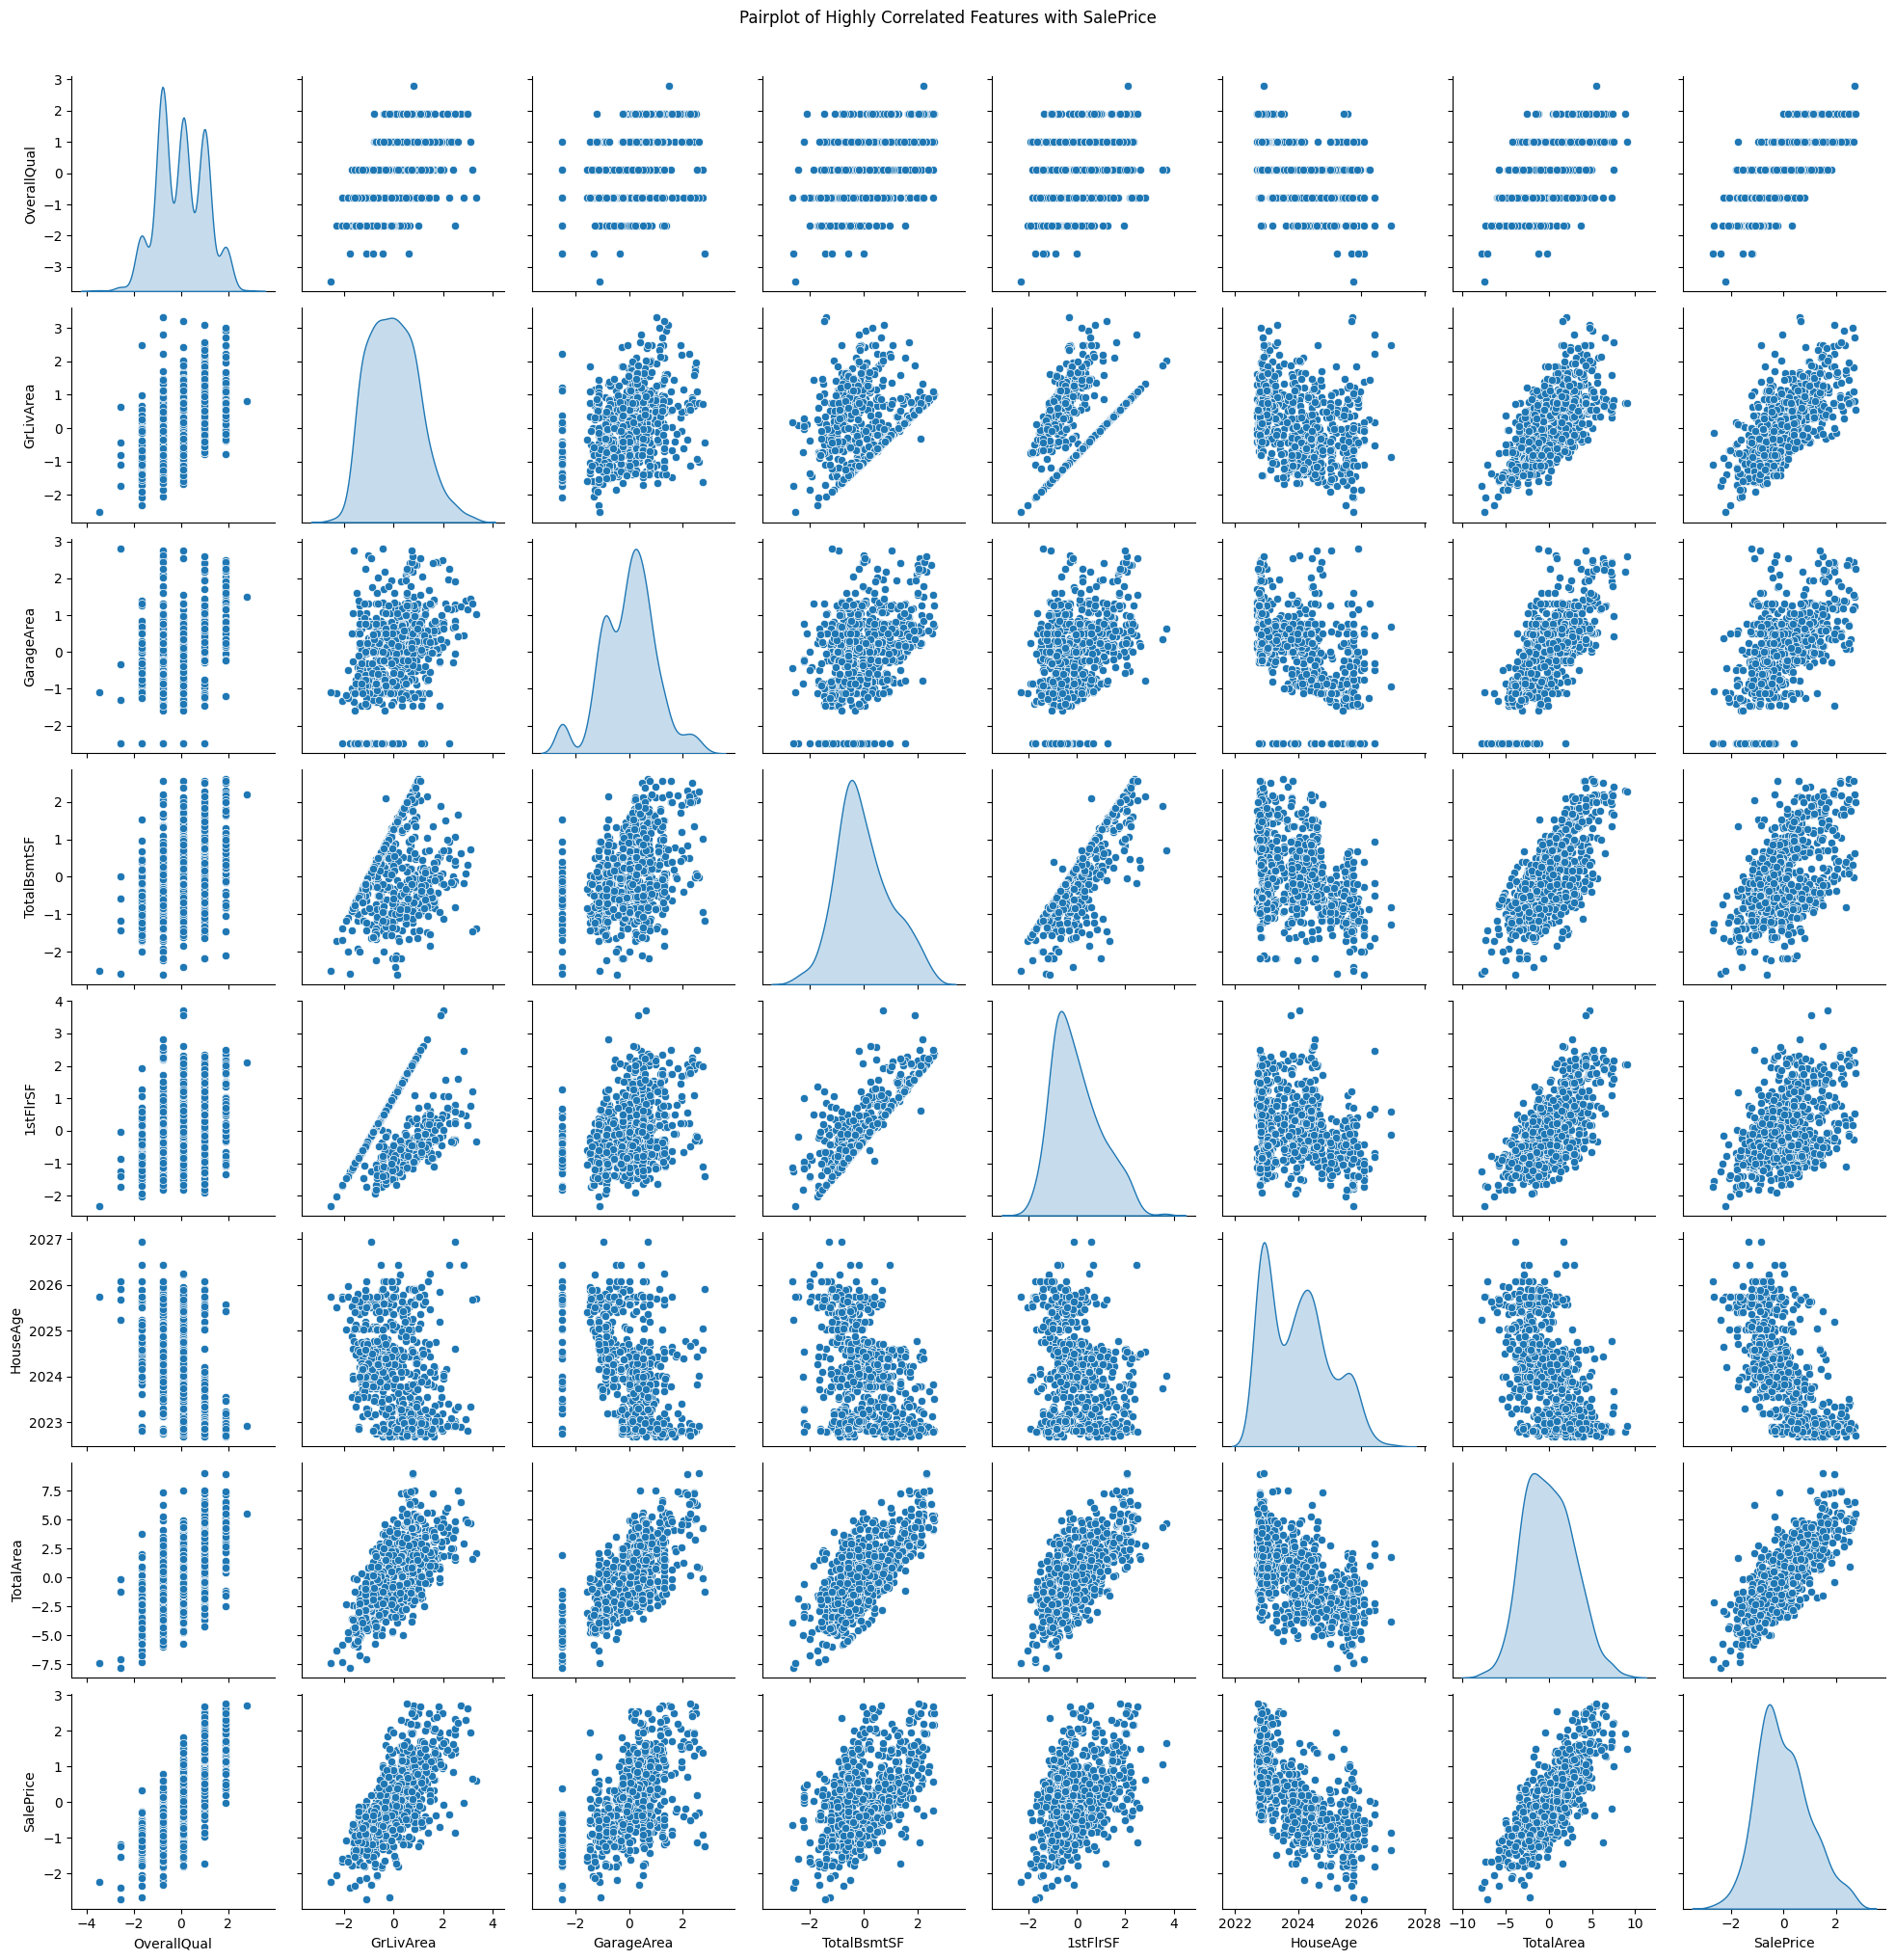

In [39]:
# Cell 5: EDA - Visualize highly correlated features with SalePrice
correlated_features = ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'HouseAge', 'TotalArea']

# Pairplot for in-depth analysis
sns.pairplot(house_prices_df_cleaned, vars=correlated_features + ['SalePrice'], diag_kind='kde')
plt.suptitle('Pairplot of Highly Correlated Features with SalePrice', y=1.02)
plt.show()

In [40]:
# Model Training and Evaluation

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separate features and target
X = house_prices_df_cleaned.drop(columns=['SalePrice'])
y = house_prices_df_cleaned['SalePrice']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Model Performance:
RMSE: 0.34
R^2 Score: 0.89


NOTE

* You may add as many sections as you want, as long as they support your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
